### ASTR 3300/5300$-$003: Astrostatistics
***N. Pol***
___

# Homework 2
### Due: Friday, Feb 7, at 11.59pm CST
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

### 1.

Usual form of Gaussian Distribution (with $\mu = 0$ and $\sigma=\sigma$) that is normalized between $\infty$ and $+\infty$:

$$p(x|\mu=0,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-x^2}{2\sigma^2}\right)$$

Now, let the corresponding half-Gaussian distribution be:

$$p_{H}(x|\mu=0,\sigma) = \frac{A}{\sigma\sqrt{2\pi}} \exp\left(\frac{-x^2}{2\sigma^2}\right)$$

The normalization condition allows us to find A as:

$$\int_{0}^{\infty} p_{H}(x|\mu=0,\sigma) = \int_{0}^{\infty} \frac{A}{\sigma\sqrt{2\pi}} \exp\left(\frac{-x^2}{2\sigma^2}\right) = 1$$
$$\Rightarrow \frac{A}{2} \int_{-\infty}^{\infty} \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-x^2}{2\sigma^2}\right) = 1$$
$$\Rightarrow  \frac{A}{2} = 1$$
$$ \Rightarrow A = 2$$
Thus, the half-Gaussian distribution (with $\mu = 0$ and $\sigma=\sigma$) that is normalized between $0$ and $+\infty$:

$$p_{H}(x|\mu=0,\sigma) = \sqrt{\frac{2}{\sigma^2 \pi}} \exp\left(\frac{-x^2}{2\sigma^2}\right)$$

### 2.

Gaussian integral takes the form:

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

Now, 

$$ \exp\left(\frac{-x^2}{2\sigma^2}\right) = p_{H}(x) \sqrt{\frac{\sigma^2 \pi}{2}} $$

where $p_{H}(x)$ represents $p_{H}(x|\mu=0,\sigma)$.

$$ \Rightarrow \int_0^\infty x^3 p_{H}(x) \sqrt{\frac{\sigma^2 \pi}{2}} \,dx = 2\sigma^4 $$

$$ \Rightarrow \sqrt{\frac{\sigma^2 \pi}{2}} \int_0^\infty x^3 p_{H}(x) \,dx = 2\sigma^4 $$

The LHS is the estimator for $f(x) = x^3$ considering the equation for Monte Carlo Integration ([from here](https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/monte-carlo-integration.html)):

$$ E[f(x)] = \int f(x) pdf(x) dx $$ 

$$ \Rightarrow \int_0^\infty x^3 p_{H}(x) \,dx = E[f(x)] = \langle x_{i}^3 \rangle $$

where $x_{i}$ are random samples drawn from $p_{H}(x)$. Thus,

$$ \sqrt{\frac{\sigma^2 \pi}{2}} \int_0^\infty x^3 p_{H}(x) \,dx = \sqrt{\frac{\sigma^2 \pi}{2}} \langle x_{i}^3 \rangle = 2\sigma^4 .$$

<!-- The integral can be approximated to a summation for large N, such that:

$$ \sum_{i=1}^{N} x_{i}^3 p_{H}(x_{i}) \sqrt{\frac{\sigma^2 \pi}{2}} = 2\sigma^4$$ -->

<!-- Let's put a high cutoff at B instead of $\infty$ for the integral ($I$).
$$ \Rightarrow I = \int_0^B x^3 p_{H} \sqrt{\frac{\sigma^2 \pi}{2}} \,dx$$

$$ \Rightarrow I = p_{H} \sqrt{\frac{\sigma^2 \pi}{2}} \int_0^B x^3  \,dx$$

$$ \Rightarrow I = p_{H} \sqrt{\frac{\sigma^2 \pi}{2}} \frac{B^4}{4} $$ -->


In [2]:
#3
def mc_integ(N):
    # Paramters for the a normal distribution
    mu = 0
    sigma = 3
    distG = scipy.stats.norm(loc=mu,scale=sigma)
    
    # Pick N random samples
    x = distG.rvs(size=N)
    # Only pick positive values from N to represent half normal distribution
    mask = x >= 0
    x = x[mask]
    
    # Now that the pdf is ready, the integral can be evaluated based on the last equation in above cell:
    lhs = np.sqrt(sigma**2*np.pi/2) * np.mean(x**3)
    
    return lhs

sigma = 3
rhs = 2*sigma**4
lhs = mc_integ(N=100000)
print(np.round(lhs,3),",",rhs)
print("Result from Monte Carlo Integration approximately matches the right hand side value.")

161.169 , 162
Result from Monte Carlo Integration approximately matches the right hand side value.


In [3]:
#4.

runs = 100
n_1e2 = np.zeros(runs)
n_1e3 = np.zeros(runs)
n_1e4 = np.zeros(runs)
n_1e5 = np.zeros(runs)

for i in range(runs):
    n_1e2[i] = mc_integ(100)
    n_1e3[i] = mc_integ(1000)
    n_1e4[i] = mc_integ(10000)
    n_1e5[i] = mc_integ(100000)

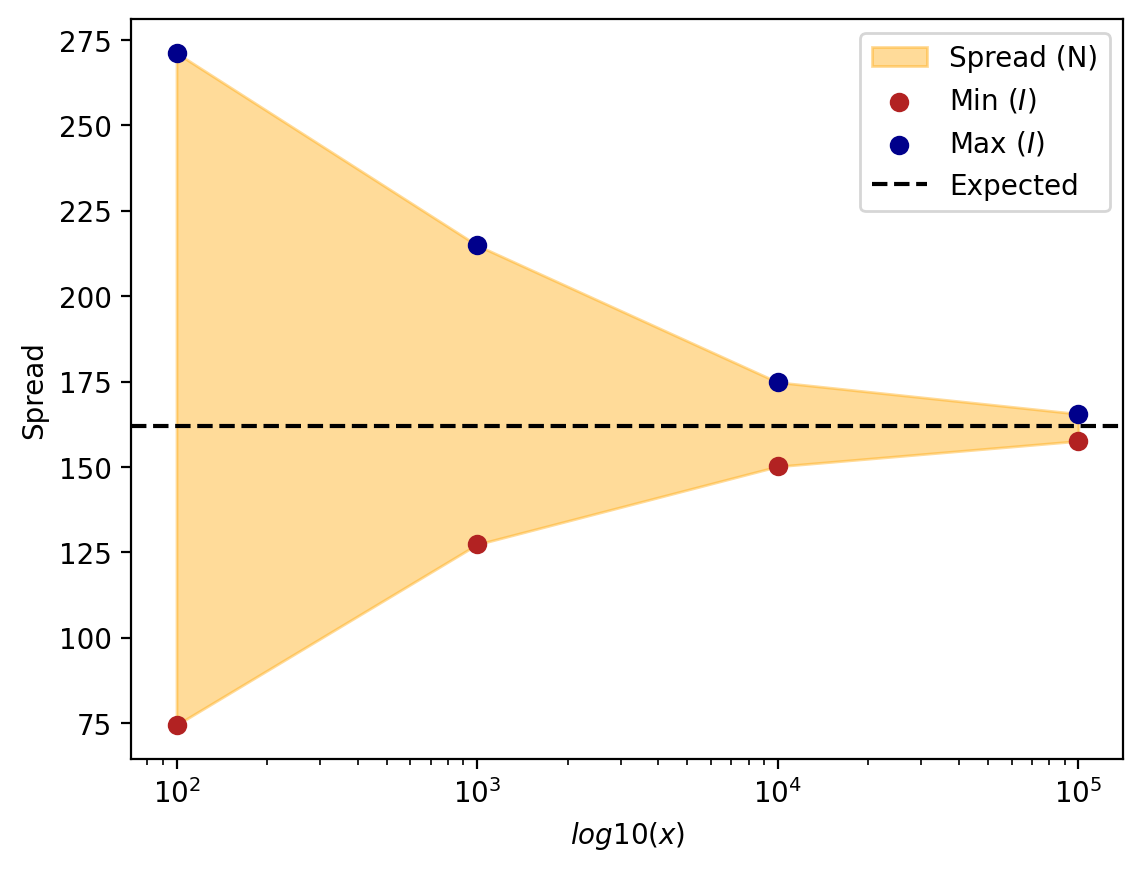

Less Numerical spread is observed as N increases. For N=1e5, the MC integration 
can be correctly approximated to the precise expected value.


In [4]:
#5. 

x = [100,1000,10000,100000]
y1 = np.array([np.min(n_1e2),np.min(n_1e3),np.min(n_1e4),np.min(n_1e5)])
y2 = np.array([np.max(n_1e2),np.max(n_1e3),np.max(n_1e4),np.max(n_1e5)])
y = y2-y1
# plt.plot(x,y)
plt.fill_between(x,y1,y2, color='orange', alpha=0.4, label="Spread (N)")
plt.scatter(x, y1, color='firebrick', label=f"Min ($I$)")  # Min values
plt.scatter(x, y2, color='darkblue', label=f"Max ($I$)")   # Max values

plt.axhline(y=162,color='black',ls = '--', label = "Expected")
plt.xscale('log')
plt.xlabel(rf'$log10(x)$')
plt.ylabel(f'Spread')
plt.legend()
plt.show()
print("""Less Numerical spread is observed as N increases. For N=1e5, the MC integration 
can be correctly approximated to the precise expected value.""")

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

Draws:  [ 92.19928512 101.33724587 113.62400734 134.56134895 102.03305682
  92.74375666  67.3340597  106.89998681 108.19778252 108.93824322]
PDF at x=145:  0.0002954565607958672


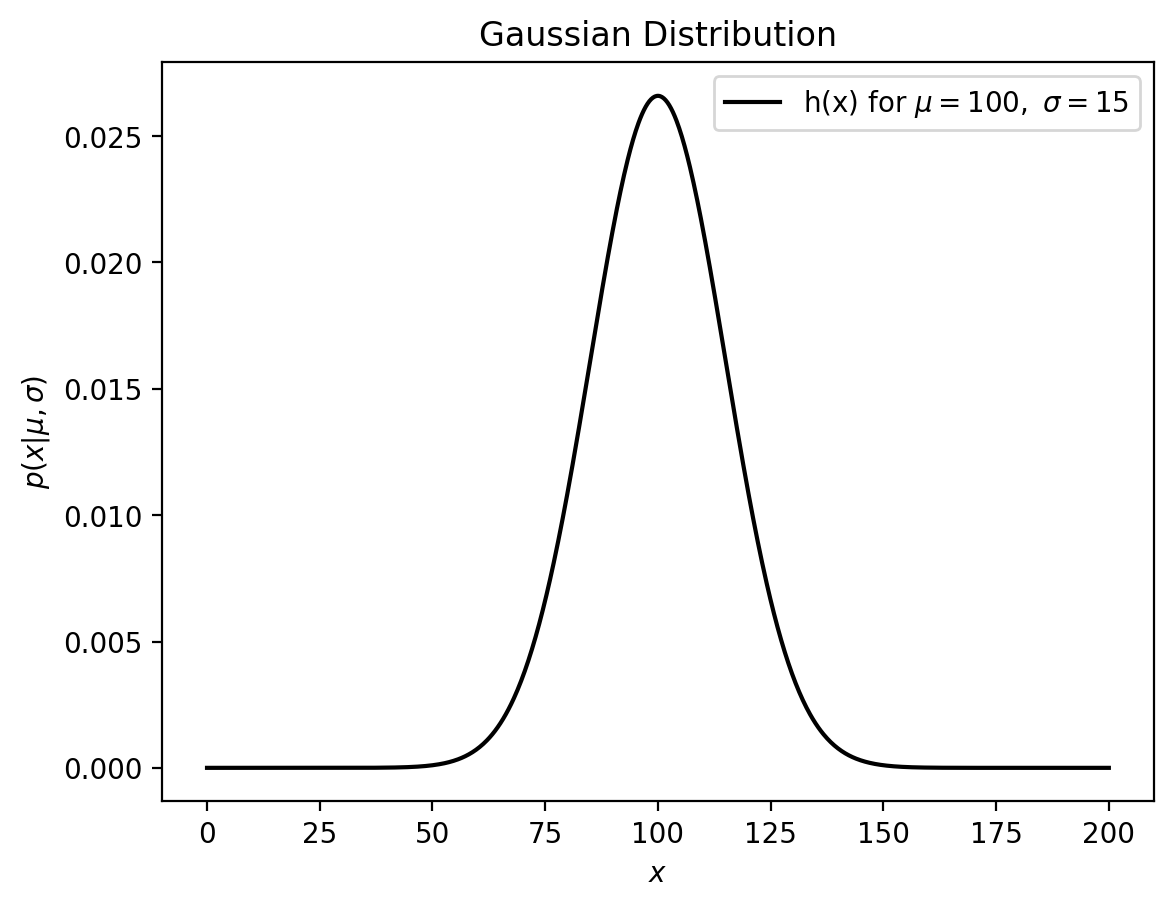

In [5]:
#1.
mu,sigma = 100,15
distG = scipy.stats.norm(mu,sigma) 
N = 10
draws = distG.rvs(size=N) # draws
p_145 = distG.pdf(x=145)
print("Draws: ", draws)
print("PDF at x=145: ",p_145)

#To plot the distribution
xgrid = np.linspace(0.001,200,1000)
plt.plot(xgrid,distG.pdf(xgrid),ls='-', c='black', label=rf'h(x) for $\mu={mu},\ \sigma={sigma}$')
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()
plt.show()

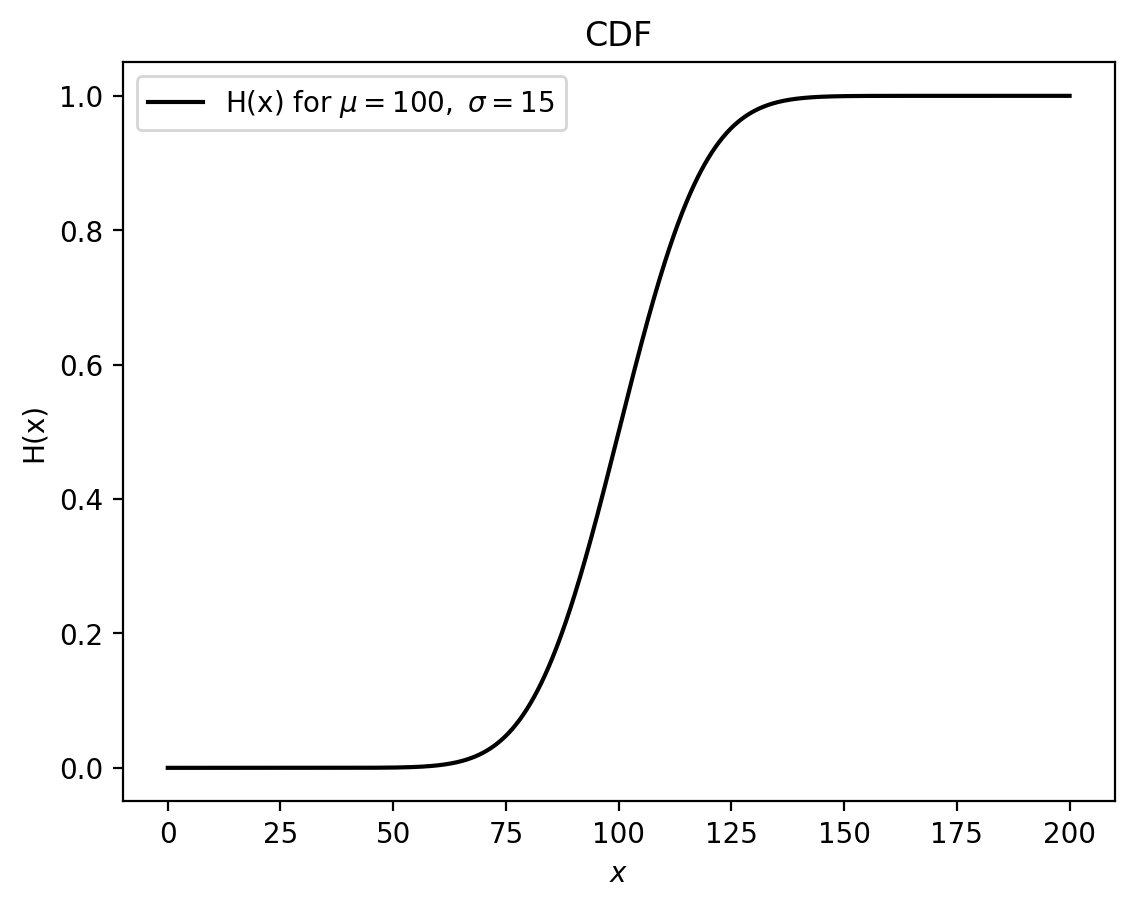

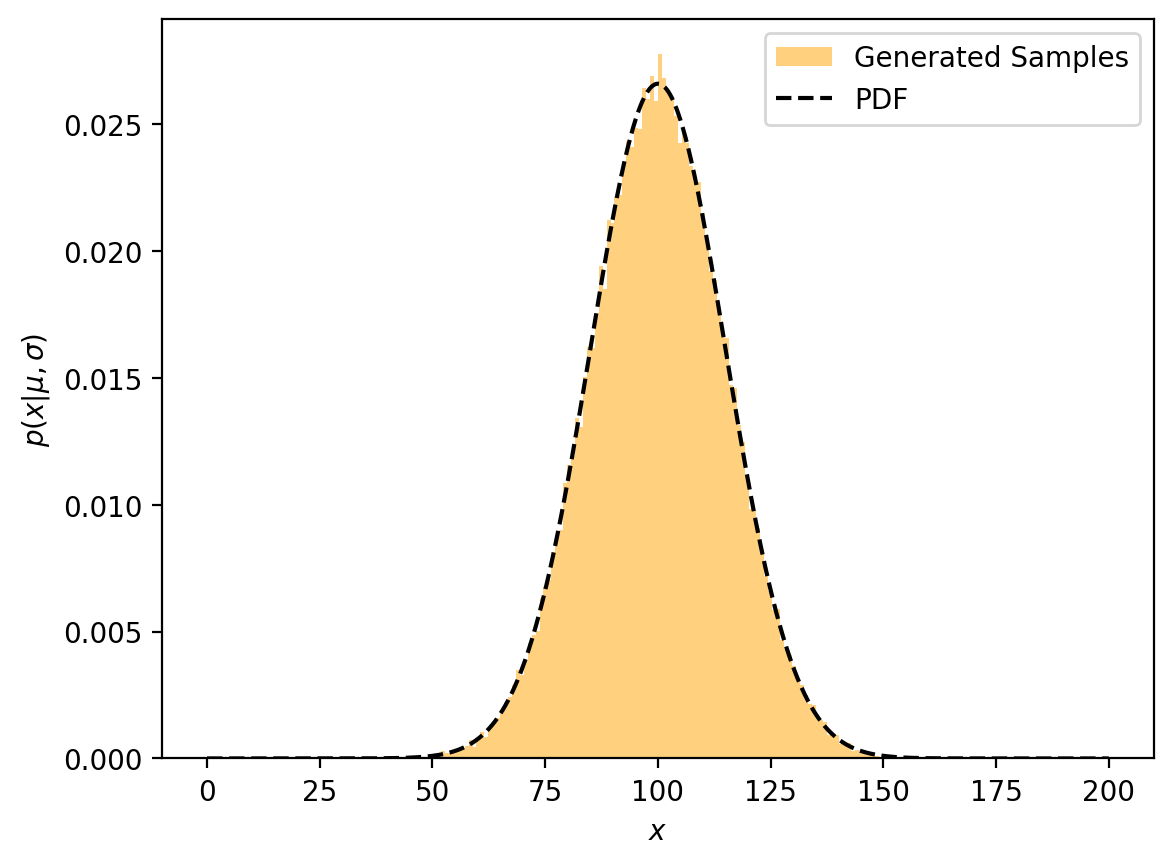

In [6]:
#2. 

#cdf
cdf = distG.cdf(xgrid)
plt.plot(xgrid,cdf,ls='-', c='black', label=rf'H(x) for $\mu={mu},\ \sigma={sigma}$')
plt.xlabel('$x$')
plt.ylabel('H(x)')
plt.title('CDF')
plt.legend()
plt.show()

#ppf
n_draws = 100000
u = np.random.rand(n_draws) # Generate random numbers between [0,1]
draws = distG.ppf(u) # Using ppf, find inverse of the cumulative distribution (which is decided by distG - original distribution).
_ = plt.hist(draws,bins='auto',density=True, color = "orange", alpha=0.5,label='Generated Samples') # plot histogram of the random draws made using ppf
plt.plot(xgrid,distG.pdf(xgrid),ls='--', color='black', label=rf'PDF')
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
# plt.title('Inverse Transform Sampling')
plt.legend()
plt.show()

In [7]:
#3.
cdf_145 = distG.cdf(145) # Find cumulative probability till 145, i.e., p(IQ < 145)
frac = 1 - cdf_145 # p(IQ>145) = 1 - p(IQ<145)
print("Percentage of people with IQ greater than 145 is", np.round(frac*100,3),"%")

Percentage of people with IQ greater than 145 is 0.135 %


In [8]:
#4. 
# Let u_oim be the probability of being one in a million
u_oim = [1/1e6,1-(1/1e6)] # both random numbers represent one in a million probability
draws = distG.ppf(u_oim) # Find the corresponding IQ when we know the probability using PPF (Inverse Cumulative Function)
print("'One in a million' IQ level corresponds to", np.round(draws,3))

# As a check, what is the probability of being one in two
u_oit = 1/2
draws = distG.ppf(u_oit) # Find the corresponding IQ when we know the probability using PPF (Inverse Cumulative Function)
print("'One in two' IQ level corresponds to", np.round(draws,3))

'One in a million' IQ level corresponds to [ 28.699 171.301]
'One in two' IQ level corresponds to 100.0


## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

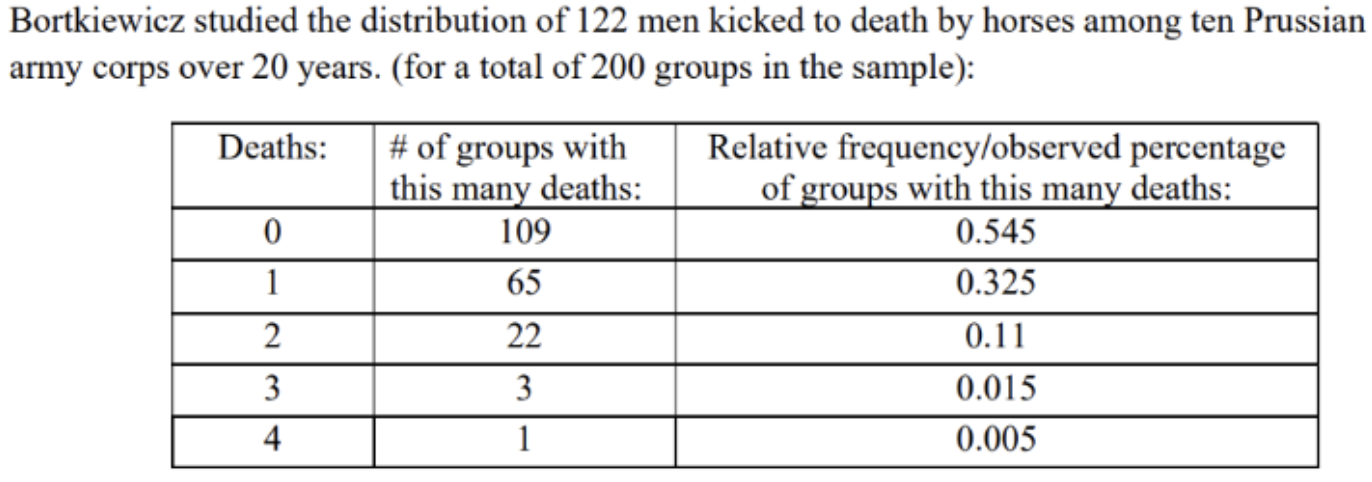

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

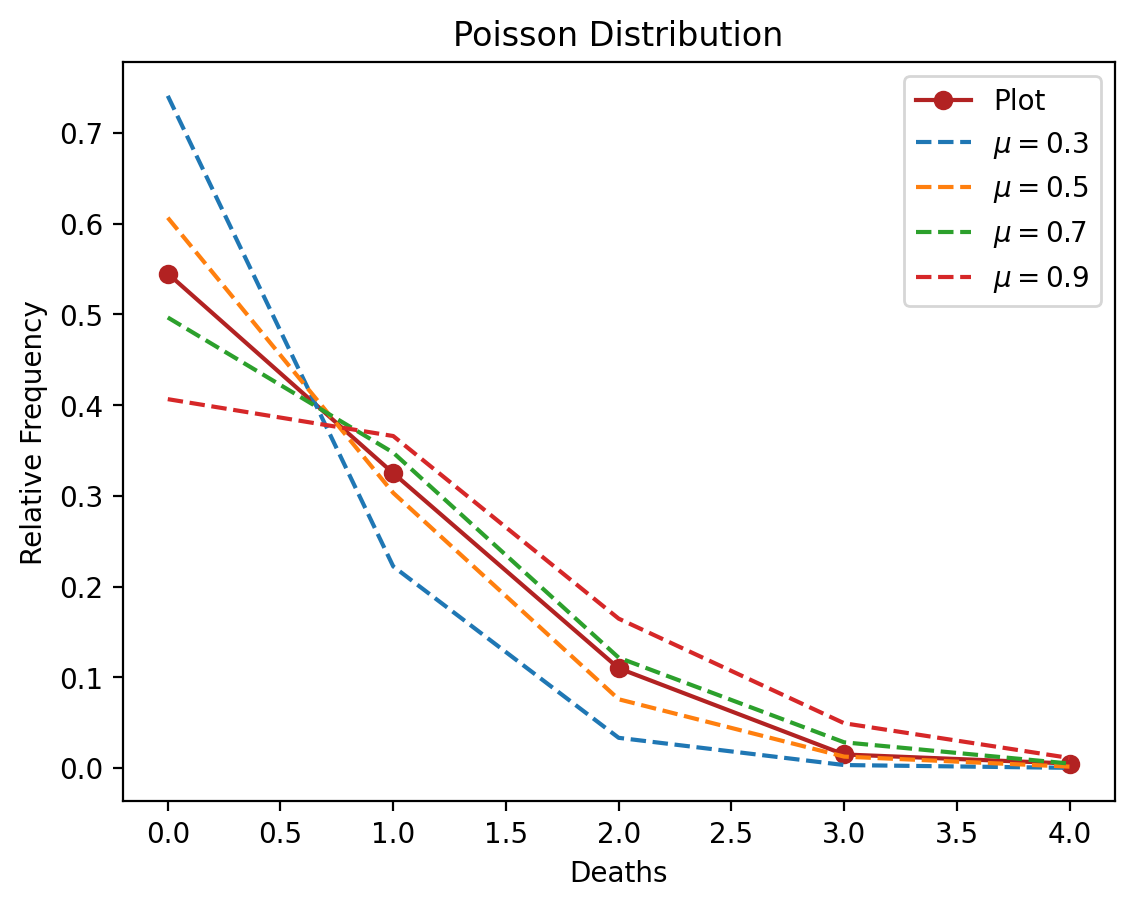

mu = 0.6 seems to be a resonable guess for the distribution as 0.5 underestimates and 0.7 overestimates.


In [9]:
#1.
deaths = [0,1,2,3,4]
n_grp = [109,65,22,3,1]
rfreq = [0.545,0.325,0.11,0.015,0.005]

plt.plot(deaths,rfreq,marker='o',color='firebrick',label='Plot')

#2. Modified code from lecture 5 for plotting

from scipy.stats import poisson
import seaborn as sns

mu_vals = [0.3,0.50,0.70,0.90]

for mu, c in zip(mu_vals, sns.color_palette()[:len(mu_vals)]):
    xgrid = np.arange(0,5)
    draws = poisson.rvs(mu, size=1000)
    # plt.hist(draws, density=True, color=c, alpha=0.2, 
    #          bins=range(0,26), label=rf'$\mu=' + str(mu) + '$')
    plt.plot(deaths,poisson.pmf(deaths, mu),color=c,ls = '--',label=rf'$\mu=' + str(mu) + '$')

plt.legend()
plt.title("Poisson Distribution")
plt.xlabel("Deaths")
plt.ylabel("Relative Frequency")
plt.show()
print("mu = 0.6 seems to be a resonable guess for the distribution as 0.5 underestimates and 0.7 overestimates.")

Mean Deaths =  0.61


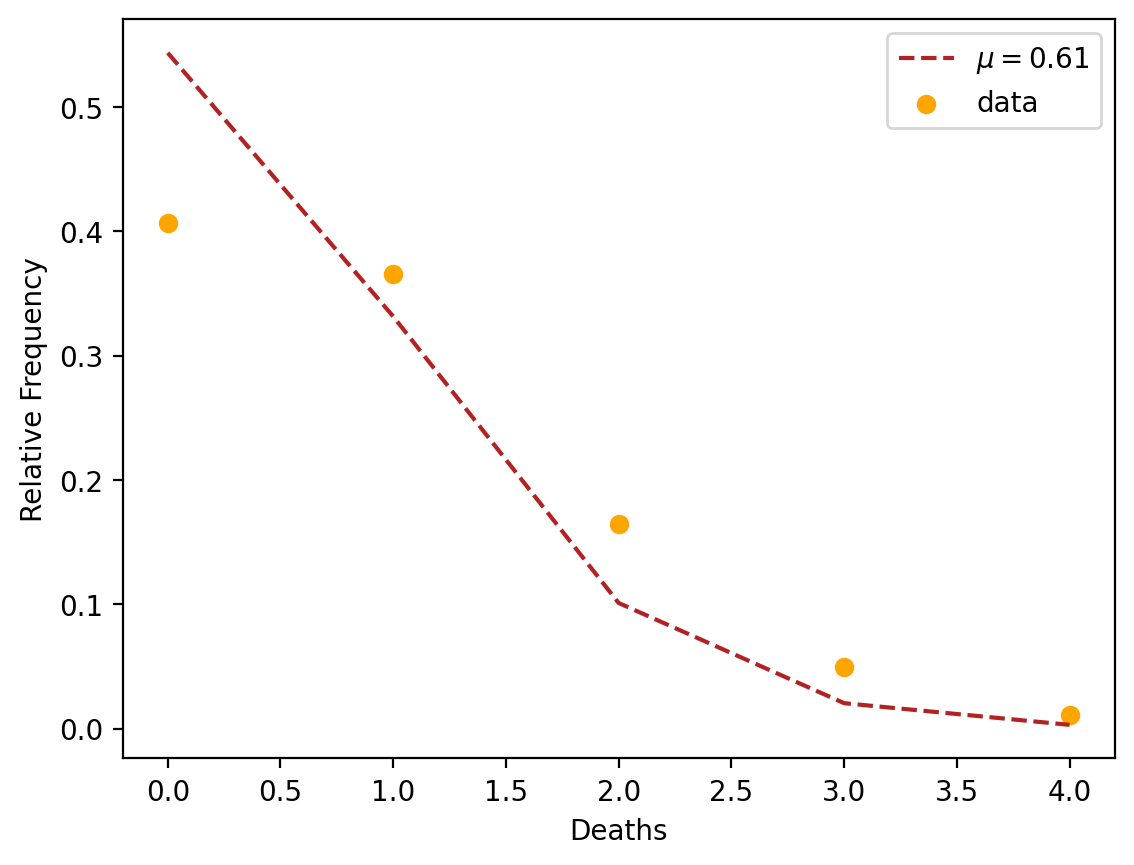

In [10]:
# To calculate sample mean, find the actual number of deaths from relative frequency (weight).

deaths_new = np.array(deaths)*np.array(rfreq)
mean_deaths = np.sum(deaths_new)
print("Mean Deaths = ",np.round(mean_deaths,3))

xgrid = np.arange(0,5)
poisson_new = poisson.pmf(xgrid, mean_deaths)
plt.plot(xgrid,poisson_new,color='firebrick',ls='--',label = rf'$\mu= 0.61$')
plt.scatter(deaths,poisson.pmf(deaths, mu),color='orange',label = rf'data')
plt.xlabel("Deaths")
plt.ylabel("Relative Frequency")
plt.legend()
plt.show()